In [1]:
import pandas as pd
import numpy as np

In [2]:
!unzip /content/vgsales.csv.zip

Archive:  /content/vgsales.csv.zip
  inflating: vgsales.csv             


In [3]:
data=pd.read_csv("vgsales.csv")

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# Exploration data analysis

## Check most platform 

In [6]:
most_platform=data["Platform"].value_counts()

In [7]:
most_platform

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [8]:
import matplotlib.pyplot as plt

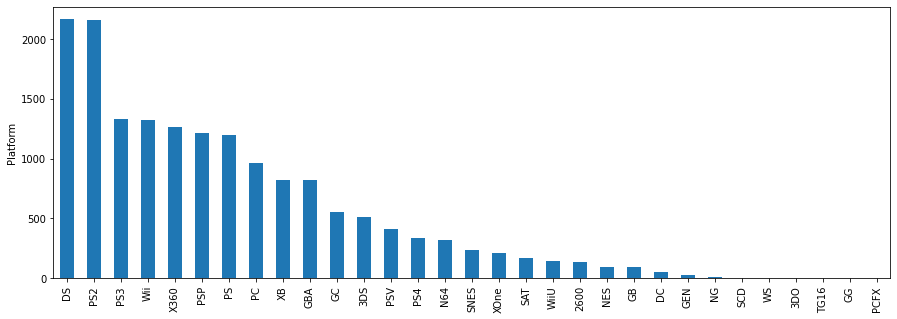

In [9]:
plt.figure(figsize=(15,5))
most_platform.plot.bar();
plt.ylabel("Total")
plt.ylabel("Platform")
plt.show()

## Check most Genre

In [10]:
most_genre=data["Genre"].value_counts()

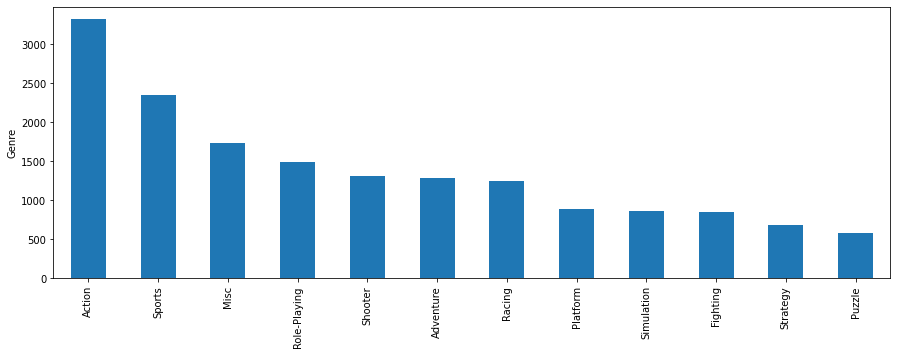

In [11]:
plt.figure(figsize=(15,5))
most_genre.plot.bar();
plt.ylabel("Total")
plt.ylabel("Genre")
plt.show()

In [12]:
import seaborn as sns

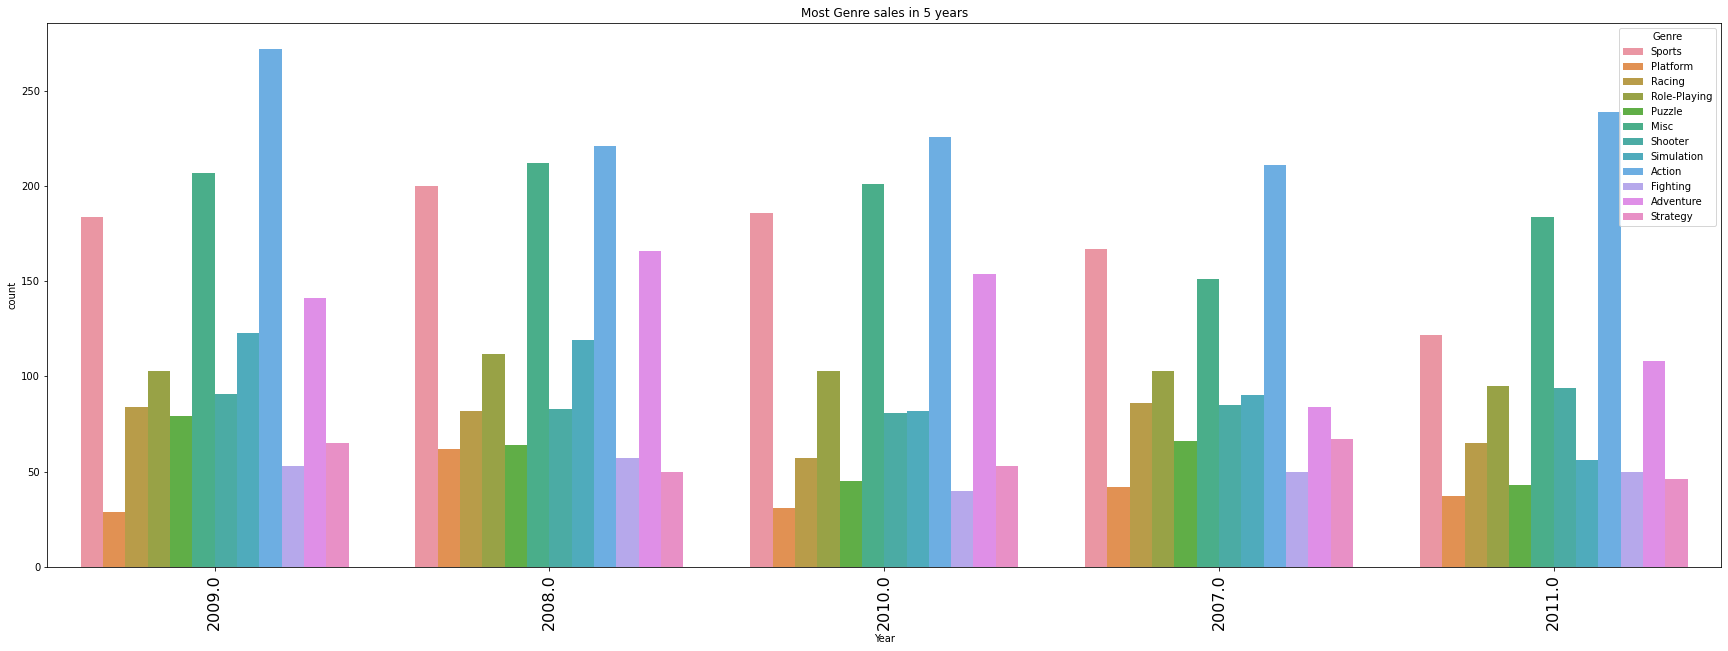

In [13]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90);
plt.title("Most Genre sales in 5 years")
plt.show()

### most 20 publisher 

In [14]:
most_publisher=data["Publisher"].value_counts()

In [15]:
most_publisher

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

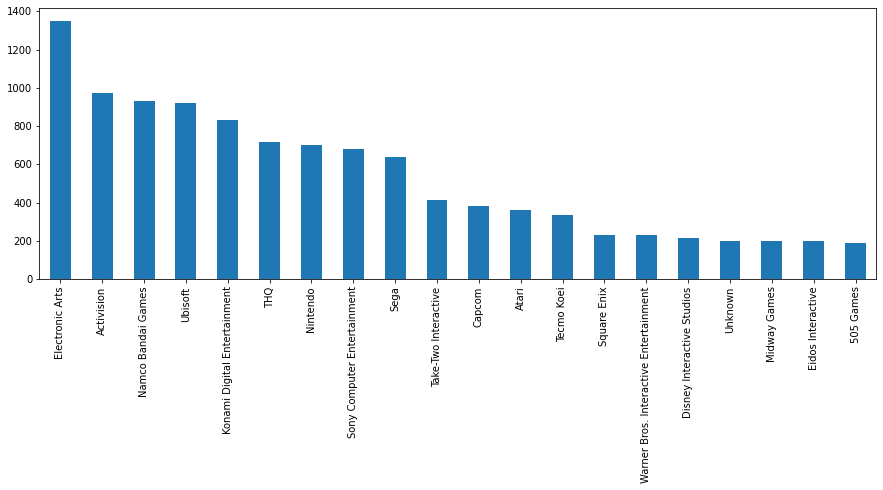

In [16]:
plt.figure(figsize=(15,5))
most_publisher.iloc[:20].plot.bar()

### Top sales region

In [17]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [18]:
region=["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]

In [19]:
top_sales_region=data[region]

In [20]:
top_sales_region

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16593,0.01,0.00,0.00,0.00,0.01
16594,0.01,0.00,0.00,0.00,0.01
16595,0.00,0.00,0.00,0.00,0.01
16596,0.00,0.01,0.00,0.00,0.01


In [21]:
top_sales_region.agg("sum")

NA_Sales        4392.95
EU_Sales        2434.13
JP_Sales        1291.02
Other_Sales      797.75
Global_Sales    8920.44
dtype: float64

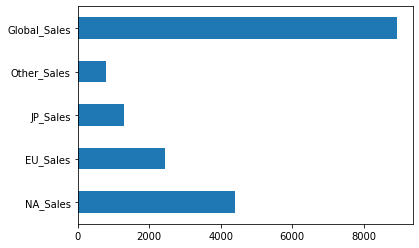

In [22]:
top_sales_region.agg("sum").plot.barh();

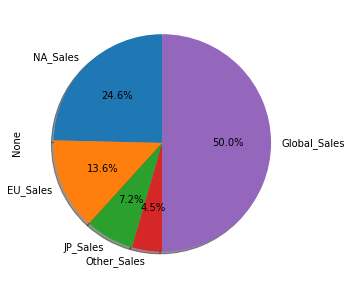

In [23]:
plt.figure(figsize=(15,5))
top_sales_region.agg("sum").plot.pie( autopct='%1.1f%%', shadow=True, startangle=90);

In [24]:
top_sales_region=top_sales_region.sum()

In [25]:
top_sales_region_df=top_sales_region.reset_index()
top_sales_region_df=top_sales_region_df.rename(columns=({"index":"region",0:"Sales"}))

In [26]:
top_sales_region_df

,region,Sales
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75
4,Global_Sales,8920.44


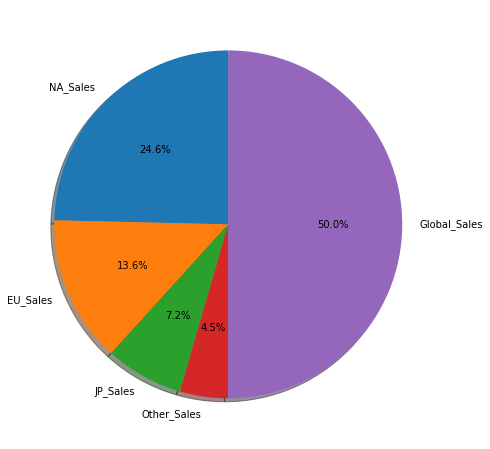

In [27]:
plt.figure(figsize=(10, 8))
plt.pie(top_sales_region_df["Sales"], labels=top_sales_region_df["region"], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## Check data

In [28]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

it can be seen that there are null data, 
the data null is : 
* Year
* Publisher



In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Handling missing data

In [30]:
data_null=data.isnull()

In [31]:
data[data_null]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
mode_publisher=data["Publisher"].mode()

In [33]:
mode_publisher

0    Electronic Arts
dtype: object

In [34]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Game most 20 sale in region

In [89]:
import plotly.express as px

In [80]:
name_game=["Name"]

In [81]:
region_data=data[region]

In [82]:
data_name_game=data[name_game]

In [83]:
most_sale_game_inRegion=pd.concat([data_name_game,region_data],axis=1)

In [84]:
most_sale_game_inRegion= most_sale_game_inRegion.groupby(by=['Name']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
most_sale_game_inRegion = most_sale_game_inRegion.head(20)

In [87]:
most_sale_game_inRegion= pd.melt(most_sale_game_inRegion, id_vars=['Name'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
most_sale_game_inRegion

,Name,Sale_Area,Sale_Price
0,Wii Sports,NA_Sales,41.49
1,Grand Theft Auto V,NA_Sales,23.46
2,Super Mario Bros.,NA_Sales,32.48
3,Tetris,NA_Sales,26.17
4,Mario Kart Wii,NA_Sales,15.85
...,...,...,...
75,Super Mario World,Other_Sales,0.75
76,Call of Duty: Black Ops 3,Other_Sales,3.42
77,Call of Duty: Modern Warfare 2,Other_Sales,3.01
78,Nintendogs,Other_Sales,2.75


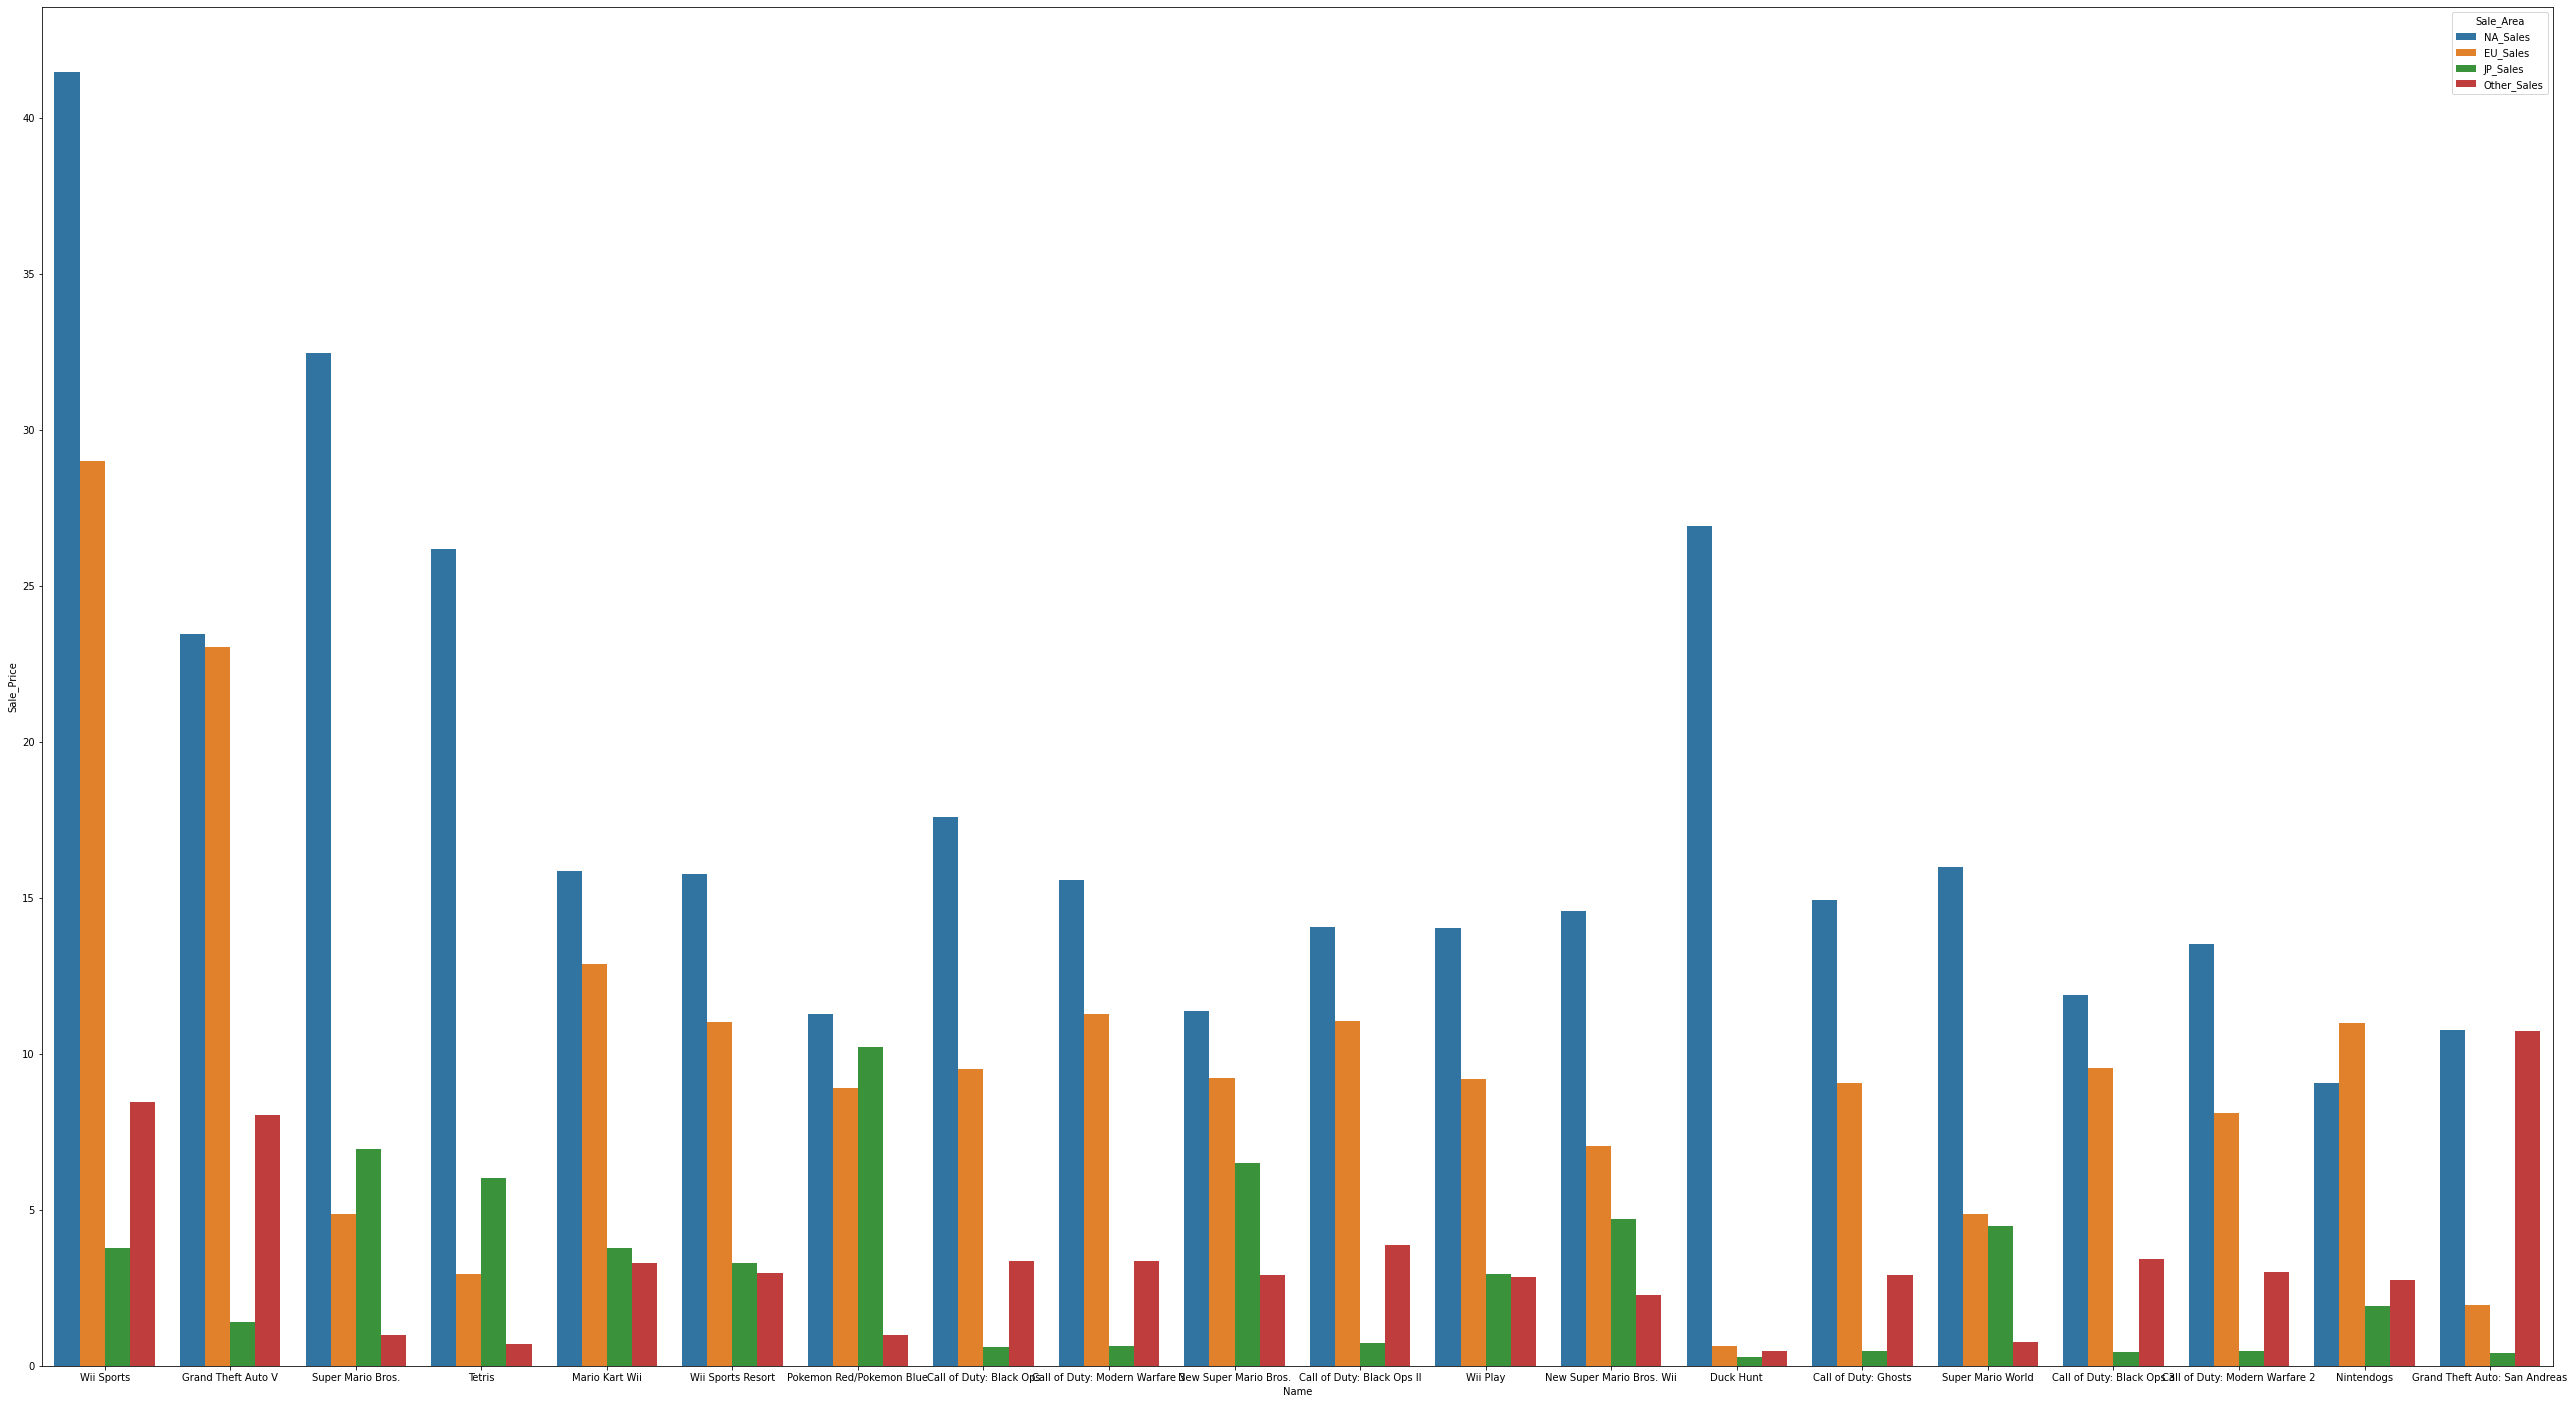

In [88]:
plt.figure(figsize=(45, 25))
sns.barplot(x='Name',y="Sale_Price",hue="Sale_Area",data=most_sale_game_inRegion)
plt.show()

In [94]:
fig = px.bar(most_sale_game_inRegion, x='Name',y="Sale_Price",color="Sale_Area")
fig.show()